In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os

Mounted at /content/gdrive


In [ ]:
# read and scale down image

img = cv2.pyrDown(cv2.imread('/content/gdrive/Shareddrives/ComED Codes and Data/Dataset/Train/Copy of gsv_148.jpg', cv2.IMREAD_UNCHANGED))


In [ ]:
# getting a threshold image and finding a contour

ret, threshed_img = cv2.threshold(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY),127, 255, cv2.THRESH_BINARY)

contours, hierarchy = cv2.findContours(threshed_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

55


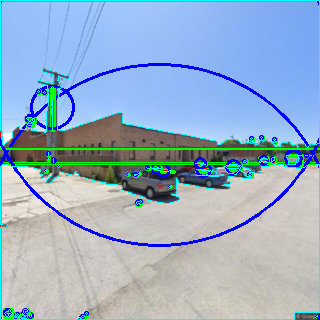

In [ ]:
# Drawing the bounding rectangle (green), minimum area rectangle(red), and minimum enclosing circle(blue)

for c in contours:
    # get the bounding rect
    x, y, w, h = cv2.boundingRect(c)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)


    # get the min area rect
    rect = cv2.minAreaRect(c)
    box = cv2.boxPoints(rect)
    # convert all coordinates floating point values to int
    box = np.int0(box)
    cv2.drawContours(img, [box], 0, (0, 0, 255))


    # get the min enclosing circle
    (x, y), radius = cv2.minEnclosingCircle(c)
    # convert all values to int
    center = (int(x), int(y))
    radius = int(radius)
    img = cv2.circle(img, center, radius, (255, 0, 0), 2)

print(len(contours))
cv2.drawContours(img, contours, -1, (255, 255, 0), 1)

cv2_imshow(img)

while True:
    key = cv2.waitKey(1)
    if key == 27: #ESC key to break
        break

cv2.destroyAllWindows()